In [1]:
!pip install sweetviz
import pandas as pd
import numpy as np
import matplotlib
import sweetviz as sv
import os
import spacy
from wordcloud import WordCloud
import en_core_web_sm
import sklearn.feature_extraction.text as text
import matplotlib.pyplot as plt
from textblob import TextBlob
from scipy.stats import pearsonr 
%matplotlib inline

print("Importing packages")

     |████████████████████████████████| 15.1MB 323kB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
Importing packages


In [2]:
# read dataset
path = ""
f = "./india-news-headlines.csv" 
print(os.listdir())
df = pd.read_csv(os.path.join(path, f))
df.head()
df.shape


['.config', 'india-news-headlines.csv', 'drive', 'sample_data']


(3297172, 3)

In [3]:
# change date from int to datetime format
df.info()
df['publish_date'] = pd.to_datetime(df['publish_date'].astype(str), format='%Y-%m-%d') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 75.5+ MB


# Exploratory Data Analysis

In [4]:
# split categories to see heirachy 
#get first category split by .
newdf = df.headline_category.str.split(".", n = 2, expand = True) 


df["first_category"] = newdf[0]
df["second_cat"] = newdf[1]
df["third_cat"] = newdf[2]
newdf.head()

,0,1,2
0,sports,wwe,None
1,unknown,None,None
2,unknown,None,None
3,unknown,None,None
4,unknown,None,None


                                             |          | [  0%]   00:00 -> (? left)


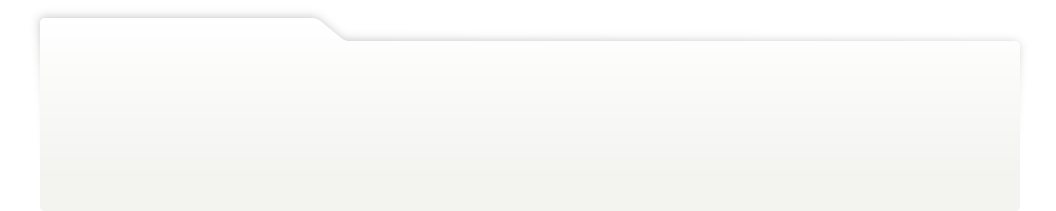
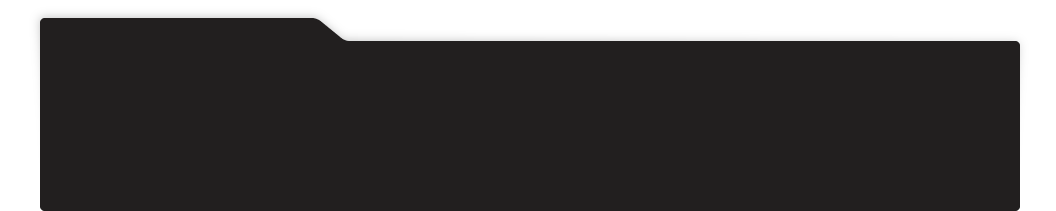
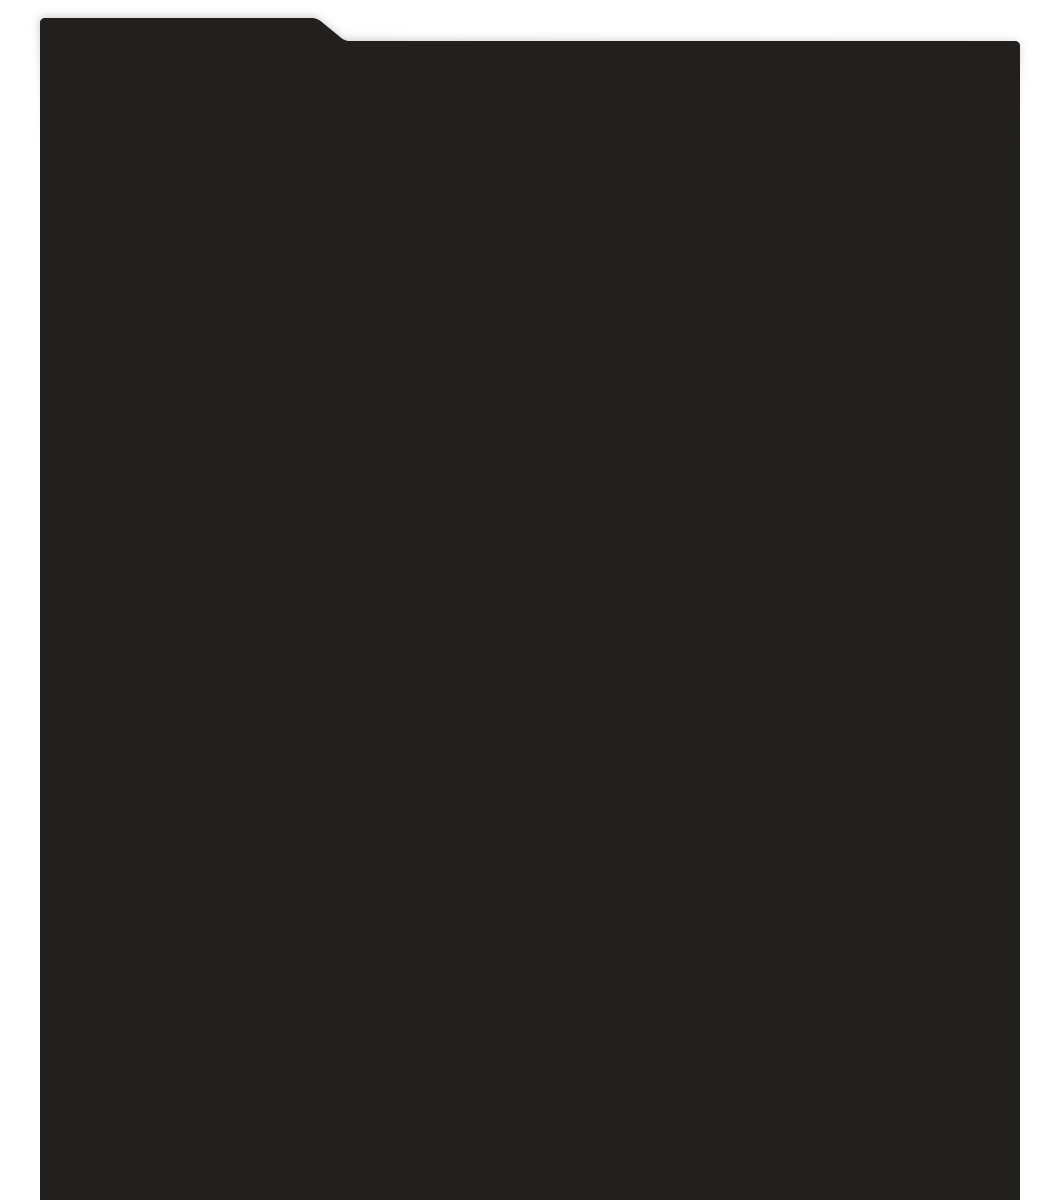
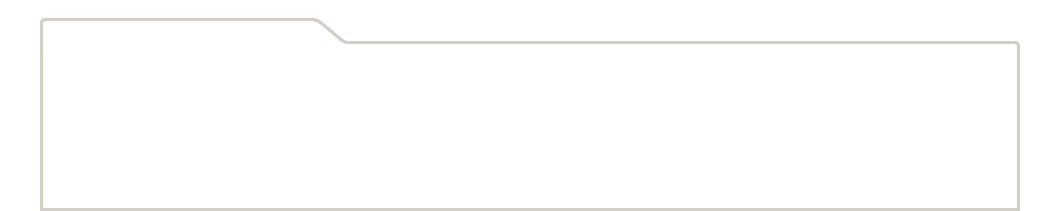
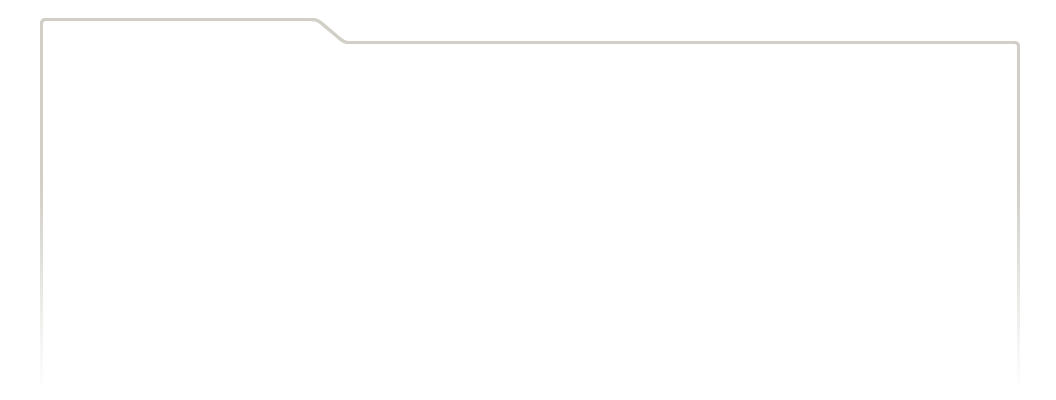
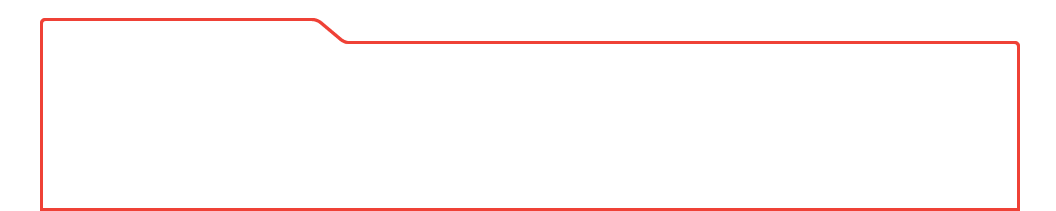
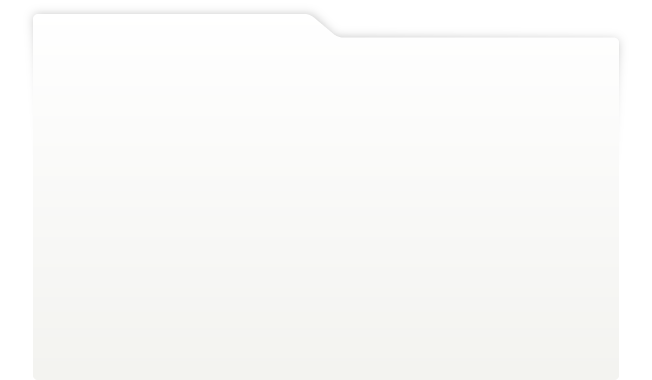
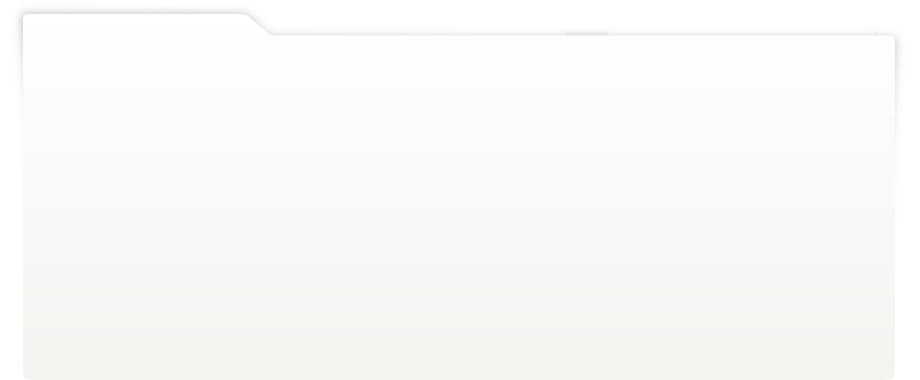
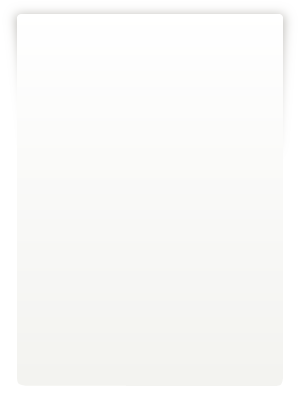
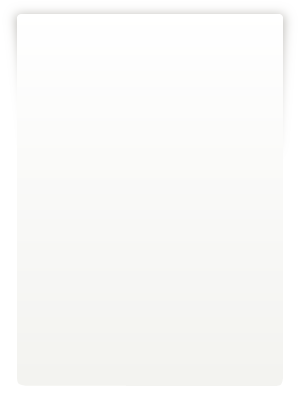
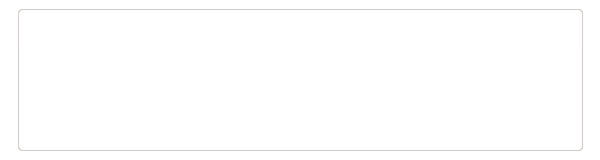
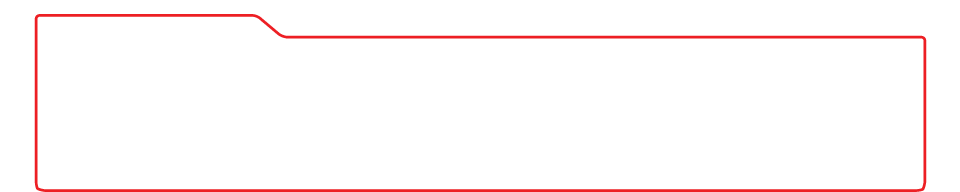
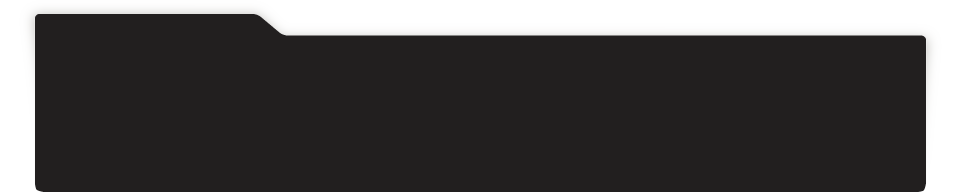
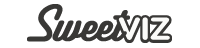
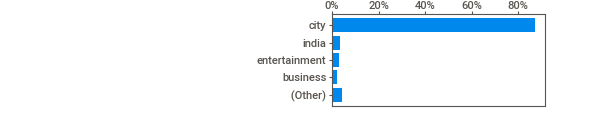
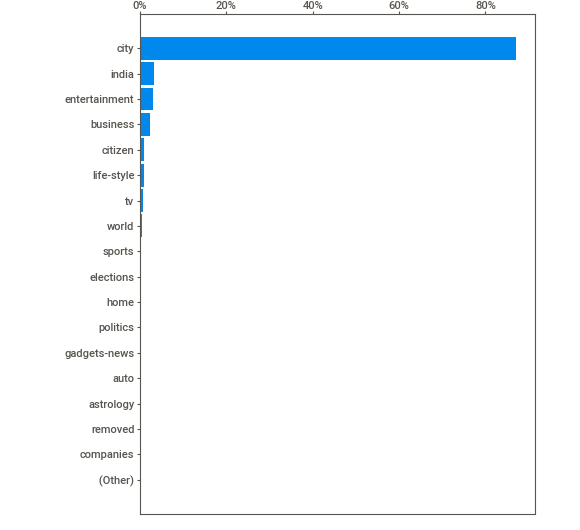
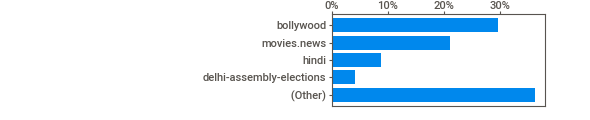
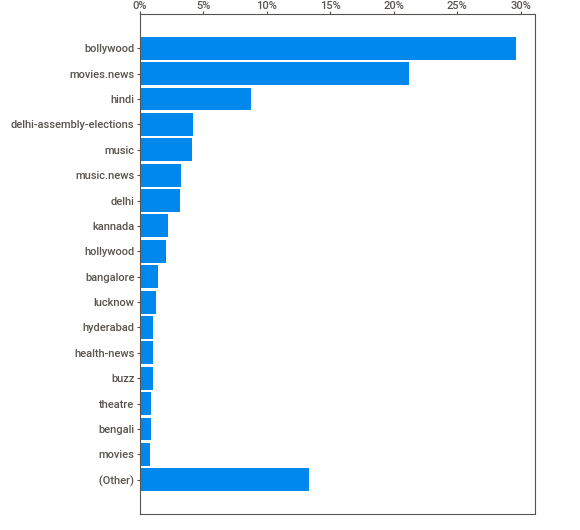
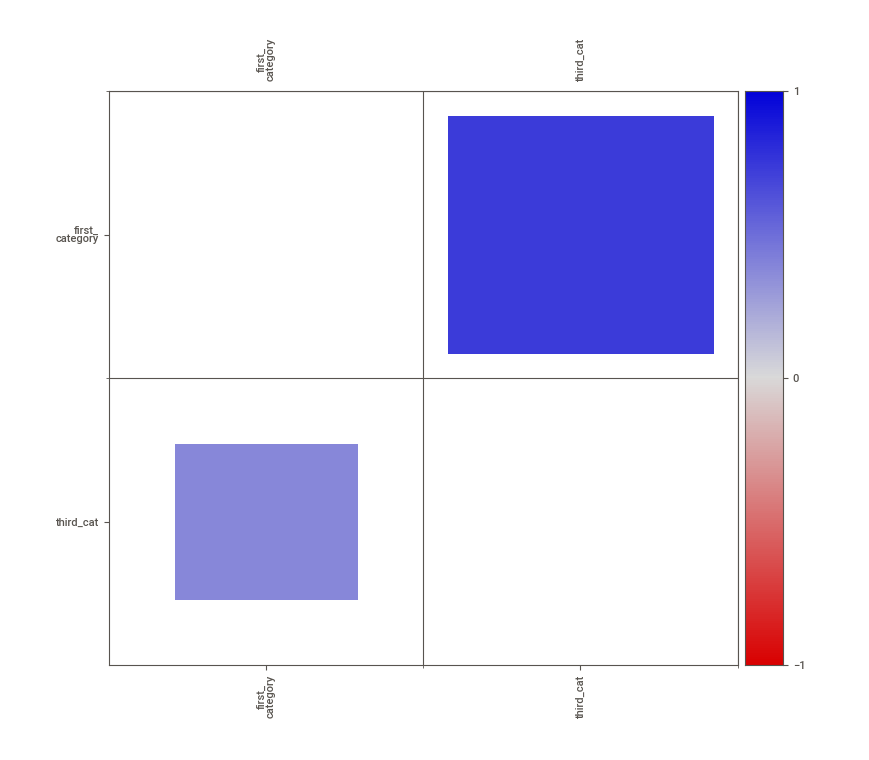
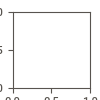

In [5]:
# Expolratory Data Analysis for 2020
df1 = df[df["publish_date"] > "2020-01-01"]
#analyzing the dataset
news_report = sv.analyze(df1)
#display the report
news_report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


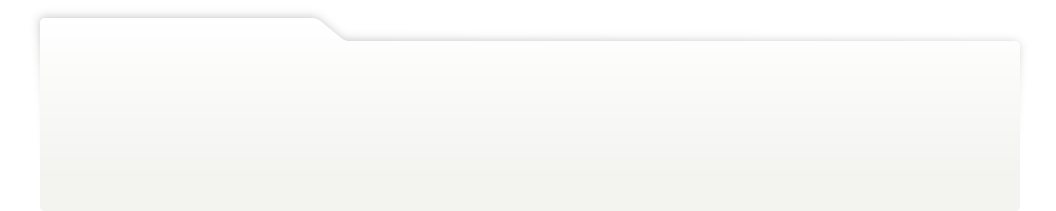
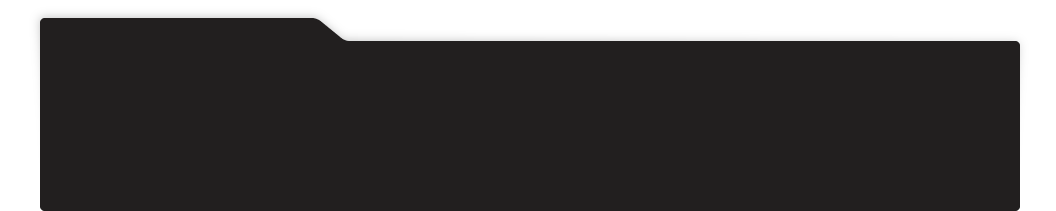
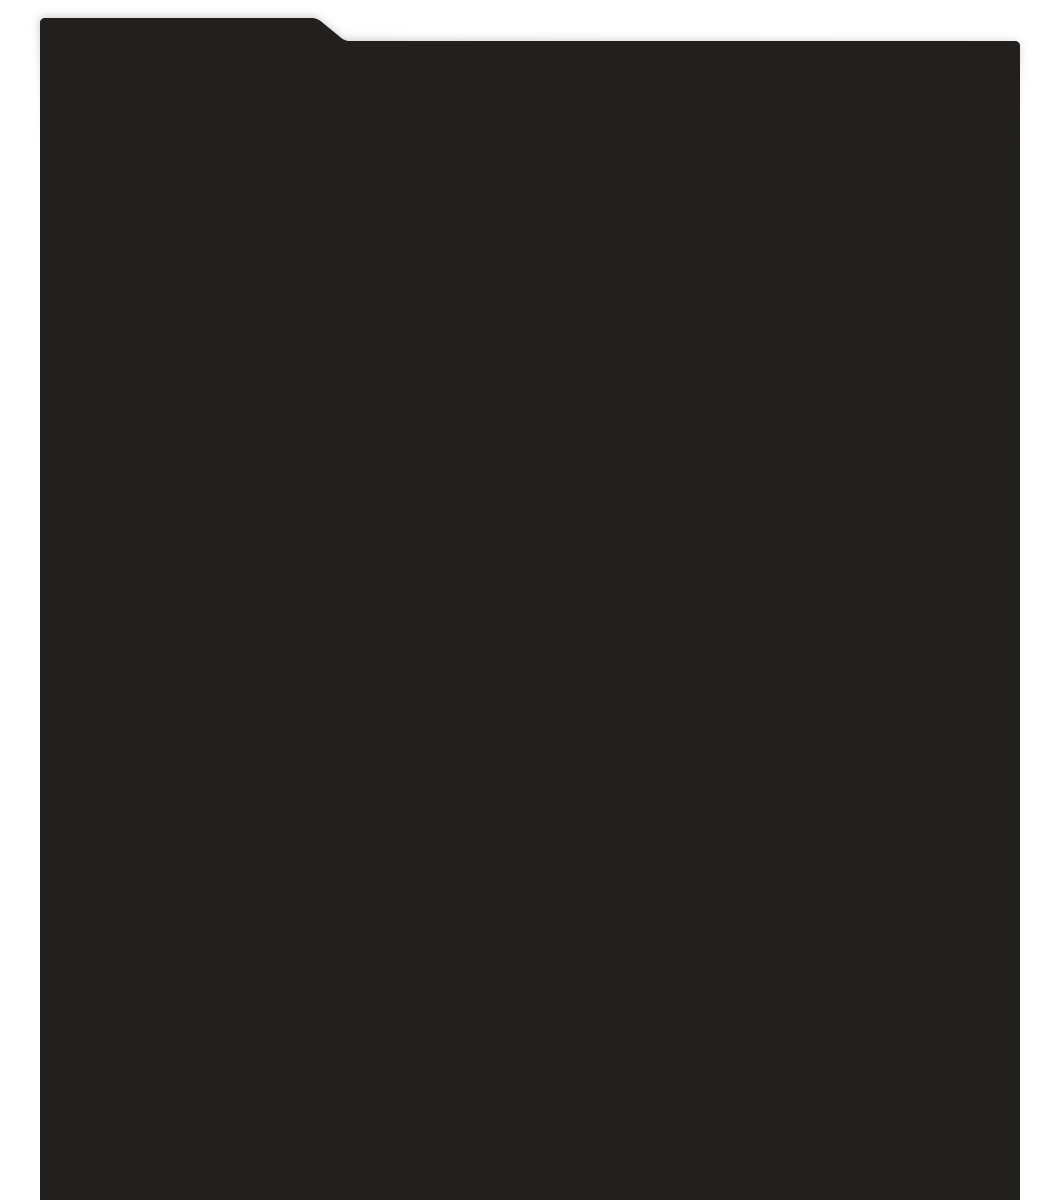
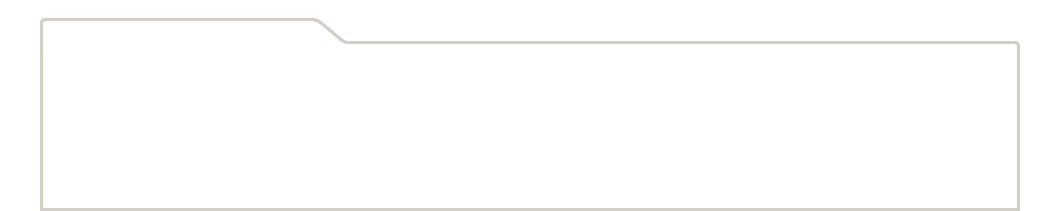
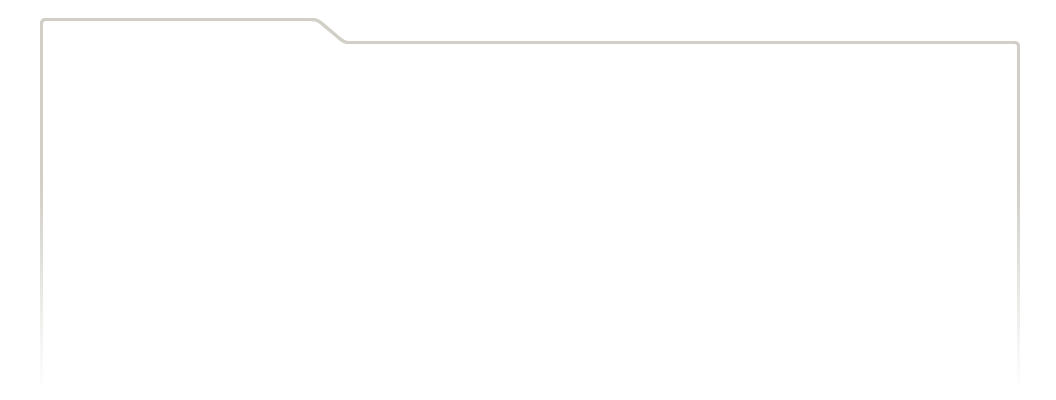
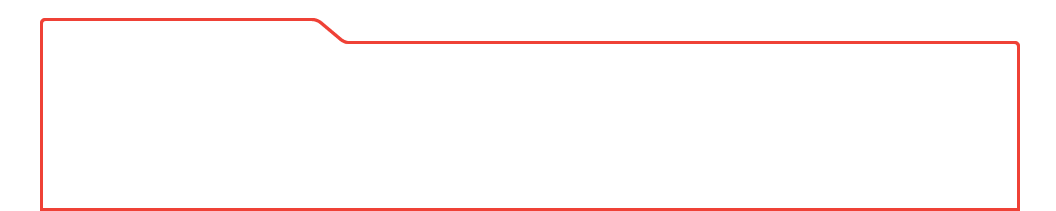
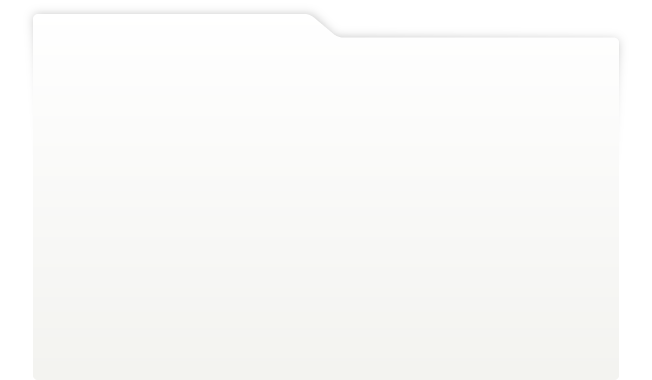
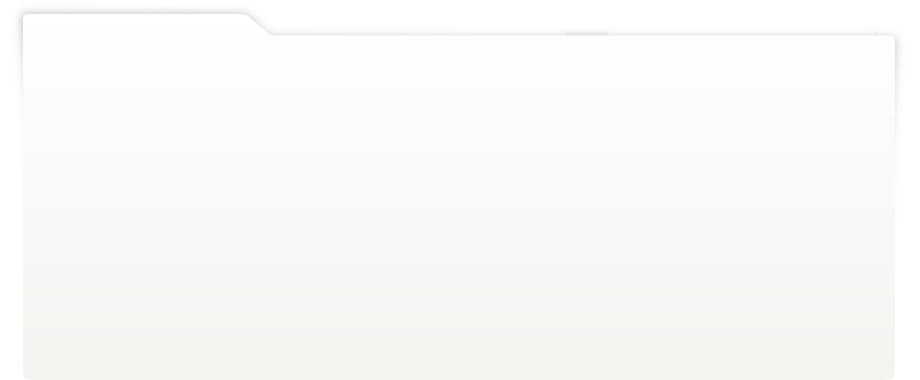
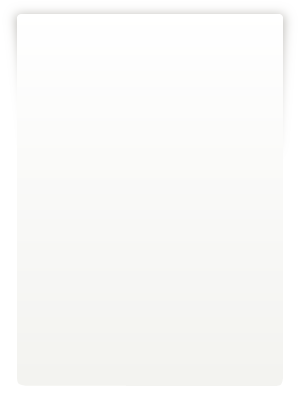
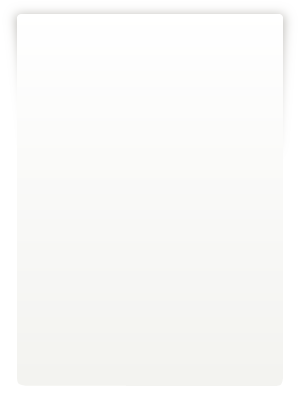
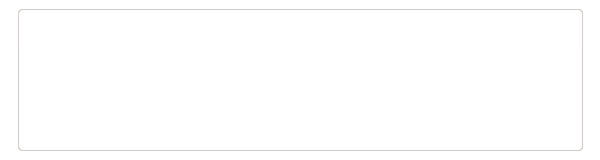
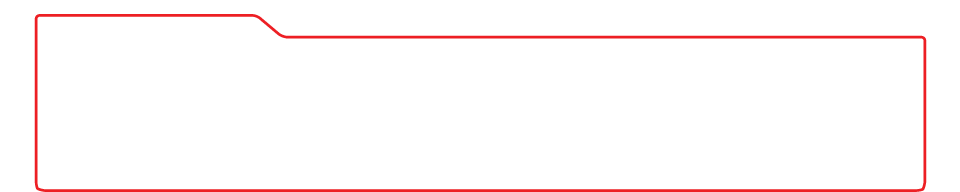
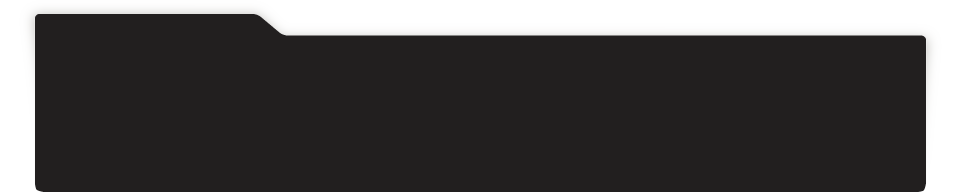
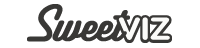
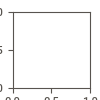
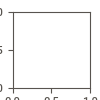

In [6]:
#EDA for entire dataset
#analyzing the dataset
news_report = sv.analyze(df)
#display the report
news_report.show_notebook()
# we can see below there is no missing data here.
# although the categories beyond category 2 start to fadeout quickly

# Gather and Clean data

In [7]:
# read data again and clean it using CRISP-DM

data=pd.read_csv("india-news-headlines.csv")
data=data[['publish_date','headline_text']].drop_duplicates()
data['publish_date']=pd.to_datetime(data['publish_date'],format="%Y%M%d")
data['year']=data['publish_date'].dt.year
data['month'] = data['publish_date'].dt.month



nlp = en_core_web_sm.load()
# nlp=spacy.load("en_core_web_lg")

# get 2019 and 2020 data 
df2020 = data[data["year"]>2019]
# data = df.copy()

In [8]:
data.head()

,publish_date,headline_text,year,month
0,2001-01-01 00:01:00,win over cena satisfying but defeating underta...,2001,1
1,2001-01-02 00:01:00,Status quo will not be disturbed at Ayodhya; s...,2001,1
2,2001-01-02 00:01:00,Fissures in Hurriyat over Pak visit,2001,1
3,2001-01-02 00:01:00,America's unwanted heading for India?,2001,1
4,2001-01-02 00:01:00,For bigwigs; it is destination Goa,2001,1


In [9]:
df2019 = data[data["year"]==2019]
df2019.head()

,publish_date,headline_text,year,month
3024416,2019-01-01 00:01:00,are you guilty of making these fashion faux pas,2019,1
3024417,2019-01-01 00:01:00,Happy New Year 2020: How to get rid of a hango...,2019,1
3024418,2019-01-01 00:01:00,Happy New Year Card Ideas 2020: Checkout these...,2019,1
3024419,2019-01-01 00:01:00,happy new year 2019 images cards gifs pictures...,2019,1
3024420,2019-01-01 00:01:00,Building teams with thumping African music,2019,1


In [10]:
# number of news articles in both the years
print(df2020.shape,df2019.shape)

(87961, 4) (170357, 4)


# What India was reading in 2019 vs 2020 

170357


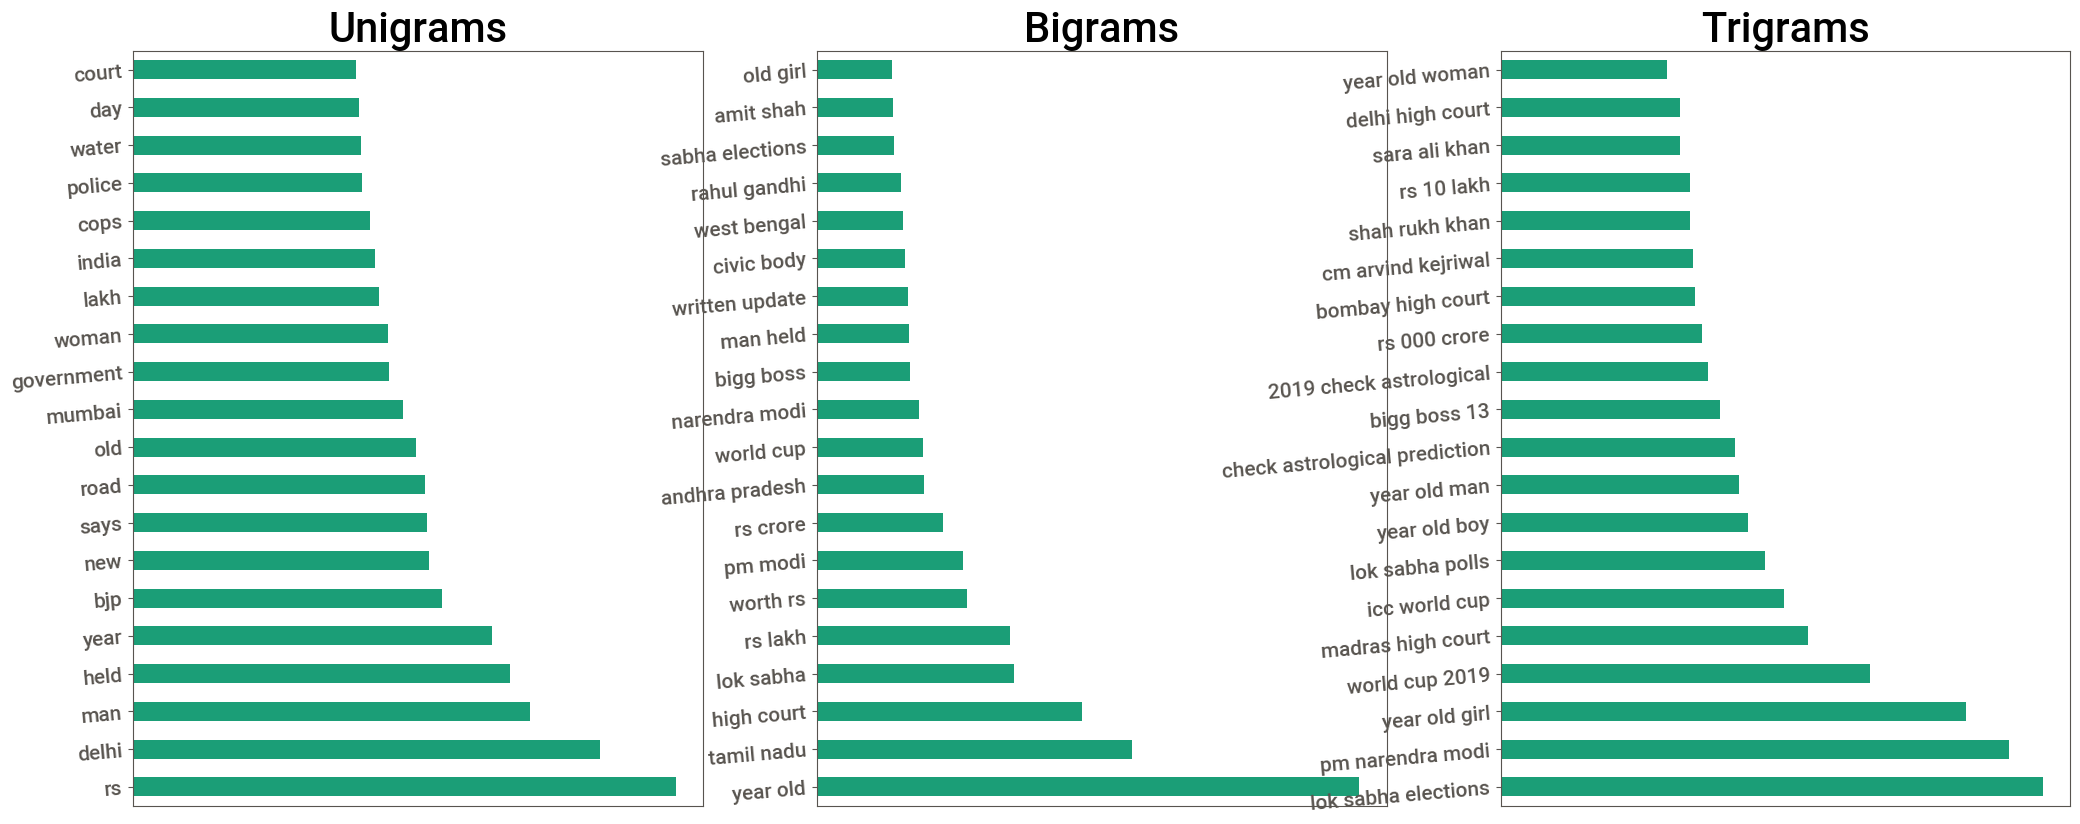

In [12]:

# Get imp words by year

def get_imp(bow,mf,ngram):
    """get important words by year

    Keyword arguments:
    bow -- bag of words
    ngram -- ngram count
    mf -- max features
    """
    tfidf=text.CountVectorizer(bow,ngram_range=(ngram,ngram),max_features=mf,stop_words='english')
    matrix=tfidf.fit_transform(bow)
    return pd.Series(np.array(matrix.sum(axis=0))[0],index=tfidf.get_feature_names()).sort_values(ascending=False).head(100)

# Global trends
bow=df2019['headline_text'].tolist()
print (len (bow))
total_data=get_imp(bow,mf=5000,ngram=1)
total_data_bigram=get_imp(bow=bow,mf=5000,ngram=2)
total_data_trigram=get_imp(bow=bow,mf=5000,ngram=3)

#Yearly trends
imp_terms_unigram={}
for y in df2019['year'].unique():
    bow=df2019[df2019['year']==y]['headline_text'].tolist()
    imp_terms_unigram[y]=get_imp(bow,mf=5000,ngram=1)
imp_terms_bigram={}
for y in df2019['year'].unique():
    bow=df2019[df2019['year']==y]['headline_text'].tolist()
    imp_terms_bigram[y]=get_imp(bow,mf=5000,ngram=2)
imp_terms_trigram={}
for y in df2019['year'].unique():
    bow=df2019[df2019['year']==y]['headline_text'].tolist()
    imp_terms_trigram[y]=get_imp(bow,mf=5000,ngram=3)


def plot_results(total_data,total_data_bigram,total_data_trigram):
  """plot unigrams, bigrams and trigrams.

  Keyword arguments:
  total_data -- total unigrams
  total_data_bigram -- total bigrams
  total_data_trigram -- total trigrams
  """
  plt.subplot(1,3,1)
  total_data.head(20).plot(kind="barh",figsize=(25,10),colormap='Dark2')
  plt.title("Unigrams",fontsize=30)
  plt.yticks(size=15,rotation=5)
  plt.xticks([])

  plt.subplot(1,3,2)
  total_data_bigram.head(20).plot(kind="barh",figsize=(25,10),colormap='Dark2')
  plt.title("Bigrams",fontsize=30)
  plt.yticks(size=15,rotation=5)
  plt.xticks([])

  plt.subplot(1,3,3)
  total_data_trigram.head(20).plot(kind="barh",figsize=(25,10),colormap='Dark2')
  plt.title("Trigrams",fontsize=30)
  plt.yticks(size=15,rotation=5)
  plt.xticks([])
  plt.show()

plot_results(total_data,total_data_bigram,total_data_trigram)


87961


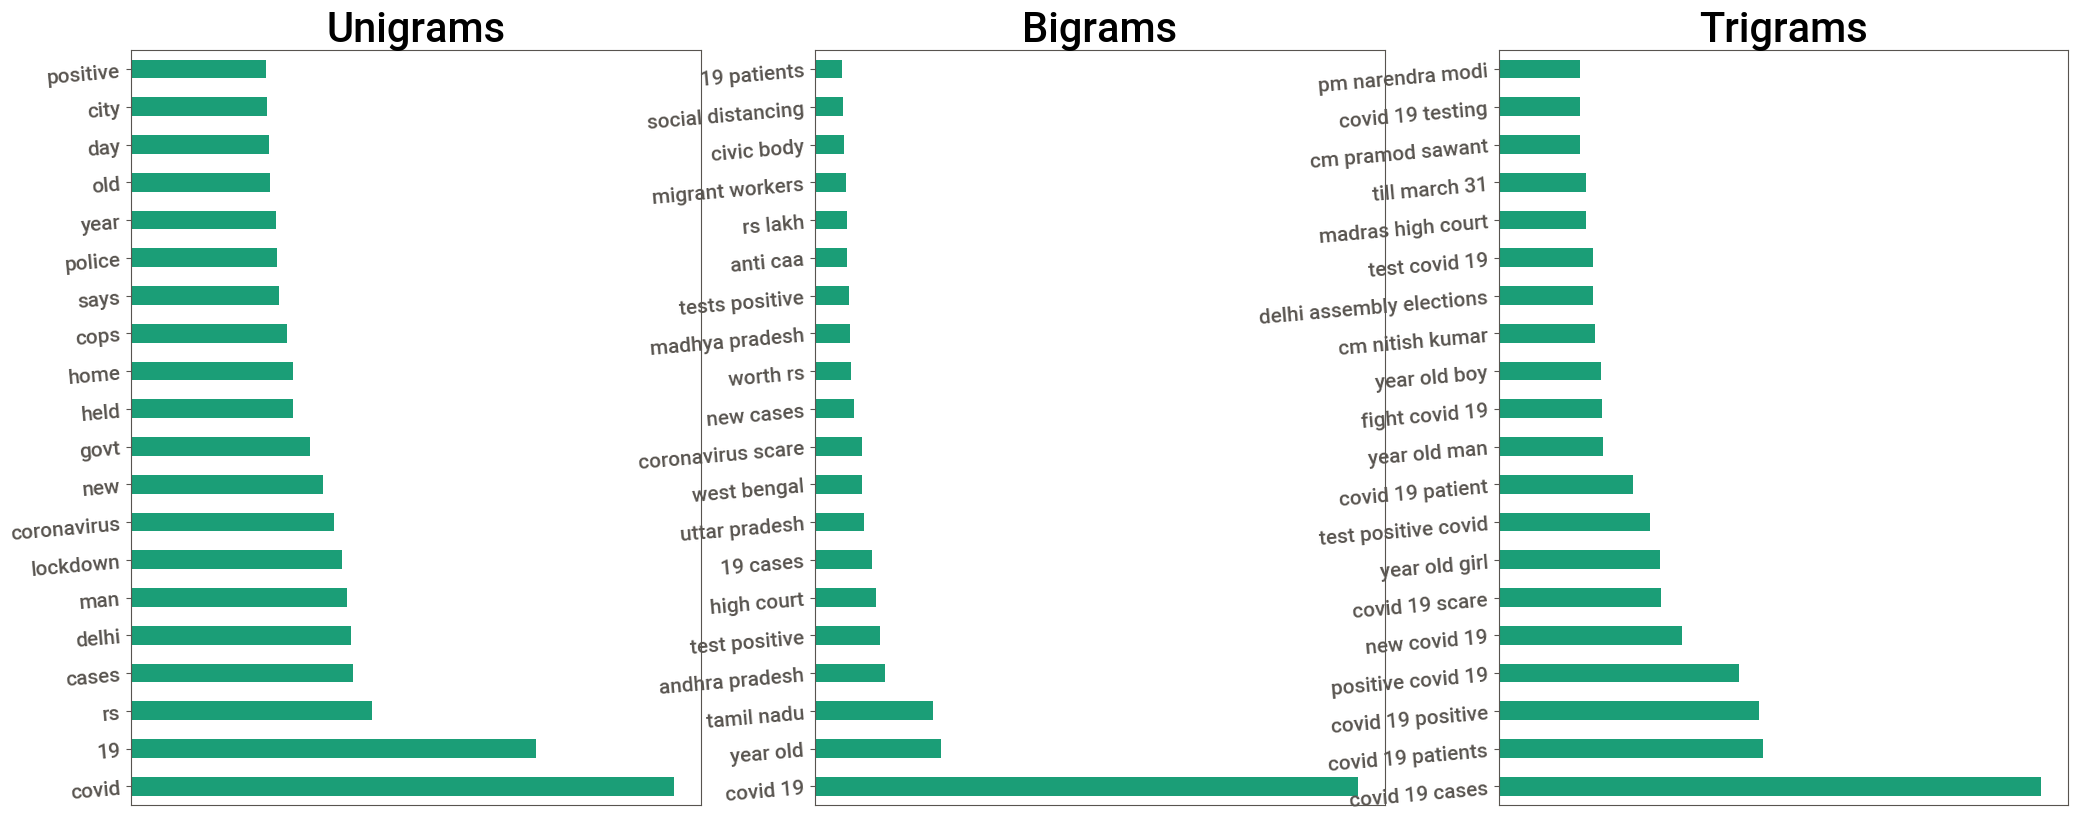

In [13]:

# Global trends 2020
bow=df2020['headline_text'].tolist()
print (len (bow))
total_data=get_imp(bow,mf=5000,ngram=1)
total_data_bigram=get_imp(bow=bow,mf=5000,ngram=2)
total_data_trigram=get_imp(bow=bow,mf=5000,ngram=3)

# Yearly trends 2020
imp_terms_unigram={}
for y in df2020['year'].unique():
    bow=df2020[df2020['year']==y]['headline_text'].tolist()
    imp_terms_unigram[y]=get_imp(bow,mf=5000,ngram=1)
imp_terms_bigram={}
for y in df2020['year'].unique():
    bow=df2020[df2020['year']==y]['headline_text'].tolist()
    imp_terms_bigram[y]=get_imp(bow,mf=5000,ngram=2)
imp_terms_trigram={}
for y in df2020['year'].unique():
    bow=df2020[df2020['year']==y]['headline_text'].tolist()
    imp_terms_trigram[y]=get_imp(bow,mf=5000,ngram=3)


plot_results(total_data,total_data_bigram,total_data_trigram)



# Sentiment analysis for BJP and Congress

In [14]:
#bjp vs congress sentiment analysis
# number of times parties has been mentioned in 2019 vs 2020
index_bjp=data['headline_text'].str.match(r"bjp.*$",case=False)
index_congress=data['headline_text'].str.match(r"congress.*$",case=False)
index_pm = data['headline_text'].str.match(r"modi.*$",case=False)
print("BJP was mentioned {} times ".format(np.sum(index_bjp)))
print("Congress was mentioned {} times".format(np.sum(index_congress)))
print("Overall BJP was mentioned {} times more than Congress".format(np.round(np.sum(index_bjp)/np.sum(index_congress),3)))

BJP was mentioned 17684 times 
Congress was mentioned 10404 times
Overall BJP was mentioned 1.7 times more than Congress


In [16]:
bjp = data[index_bjp]
congress = data[index_congress]
modi = data[index_pm]
# setiment analysis for BJP and congress


# compute sentiment scores (polarity) and labels
def compute_sentiments(data):
  """compute sentiments for given data.

  Keyword arguments:
  data -- input data for sentiment analysis
  """
  sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in data['headline_text']]
  sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]
  return sentiment_scores_tb, sentiment_category_tb

sentiment_scores_tb, sentiment_category_tb = compute_sentiments(bjp)

bjp_sent = pd.DataFrame(sentiment_category_tb )
bjp_vals = bjp_sent.value_counts()
print (bjp_vals)

sentiment_scores_tb, sentiment_category_tb = compute_sentiments(modi)
modi_sent = pd.DataFrame(sentiment_category_tb )
modi_vals = modi_sent.value_counts()
print (modi_vals)

sentiment_scores_tb, sentiment_category_tb = compute_sentiments(congress)
cong_sent = pd.DataFrame(sentiment_category_tb )
cong_vals = cong_sent.value_counts()

neutral     13664
positive     2443
negative     1577
dtype: int64
neutral     3141
positive     661
negative     352
dtype: int64


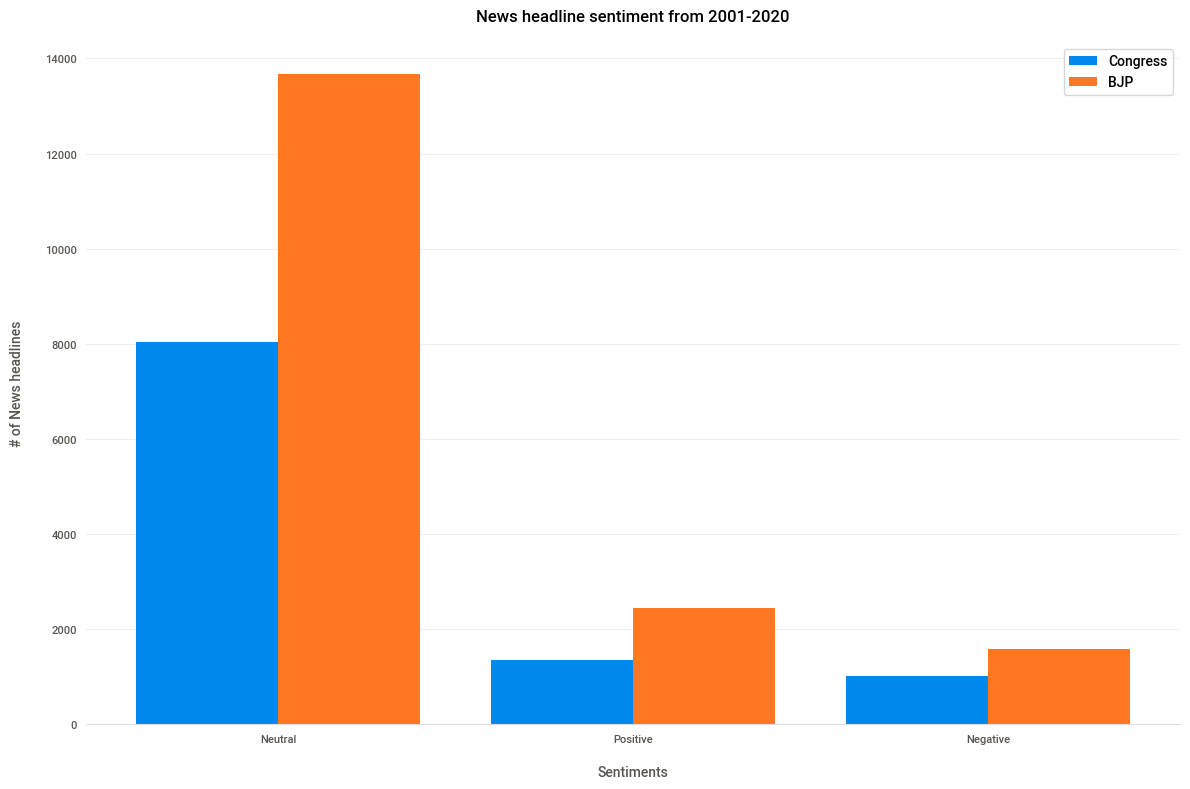

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(["Neutral","Positive","Negative"]))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, cong_vals, width=bar_width,label = "Congress")
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, bjp_vals,
            width=bar_width,label="BJP")
 
# Create legend & Show graphic for total sentiments for both parties
plt.legend()
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["Neutral","Positive","Negative"])
# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Sentiments', labelpad=15)
ax.set_ylabel('# of News headlines', labelpad=15)
ax.set_title('News headline sentiment from 2001-2020', pad=15)

fig.tight_layout()
plt.show()


In [18]:
#Group by + - neutral for last 20 years - Only positive negative

bpos = []
bneg = []
bneu = []
cpos = []
cneg = []
cneu  =[]


for year in np.arange(2001,2021,1):
  b = bjp[bjp["year"] == year ]
  c = congress[congress["year"] ==year ]
  
  sentiment_scores_tb, sentiment_category_tb = compute_sentiments(b)
  bjp_sent = pd.DataFrame(sentiment_category_tb )
  bjp_vals = bjp_sent.value_counts()
  bpos.append(bjp_vals[0])
  bneg.append(bjp_vals[1])
  bneu.append(bjp_vals[2])

  sentiment_scores_tb, sentiment_category_tb = compute_sentiments(c)
  cong_sent = pd.DataFrame(sentiment_category_tb )
  cong_vals = cong_sent.value_counts()
  cpos.append(cong_vals[0])
  cneg.append(cong_vals[1])
  cneu.append(cong_vals[2])

years = np.arange(2001,2021,1)

In [19]:
# compute deviations of the emotions from the mean sentiment for both parties
# print (bpos,len(bpos),years,len(years))
bpos2 = pd.DataFrame(bpos)
cpos2 = pd.DataFrame(cpos)
bmean = bpos2.sub(bpos2.mean())
cmean = cpos2.sub(cpos2.mean())
# print (cmean, bmean)
cmean = cmean[0].to_numpy()
bmean = bmean[0].to_numpy()
# print (cmean, bmean)

In [20]:
# compute deviations of the emotions from the mean sentiment for both parties
bneg2 = pd.DataFrame(bneg)
cneg2 = pd.DataFrame(cneg)
bnmean = bneg2.sub(bneg2.mean())
cnmean = cneg2.sub(cneg2.mean())
# print (cnmean, bnmean)
cnmean = cnmean[0].to_numpy()
bnmean = bnmean[0].to_numpy()
# print (cnmean, bnmean)

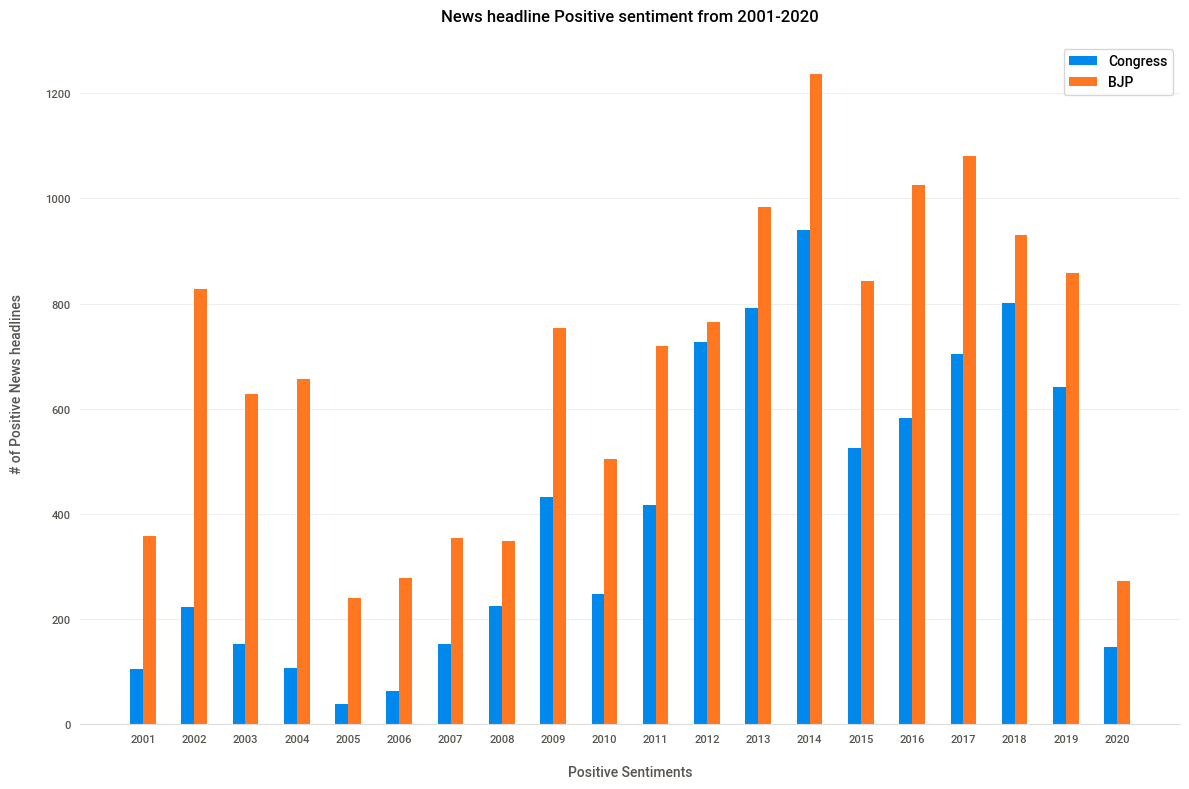

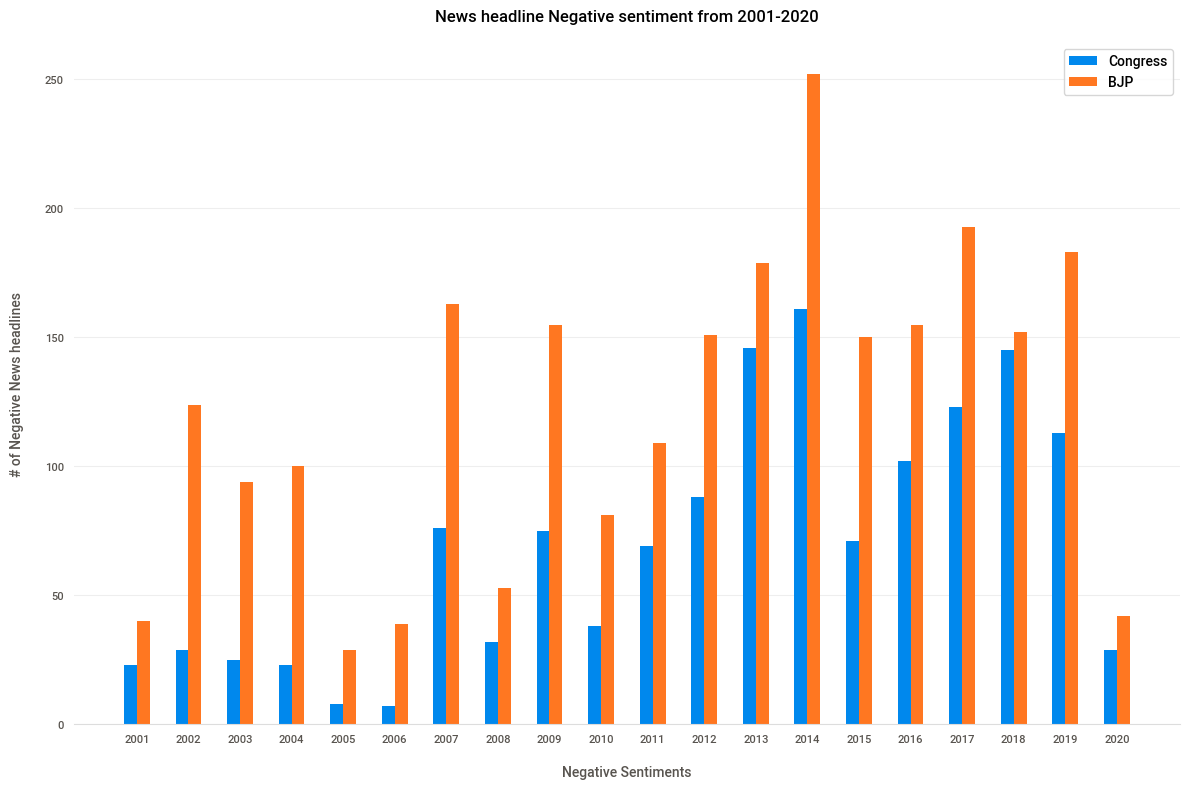

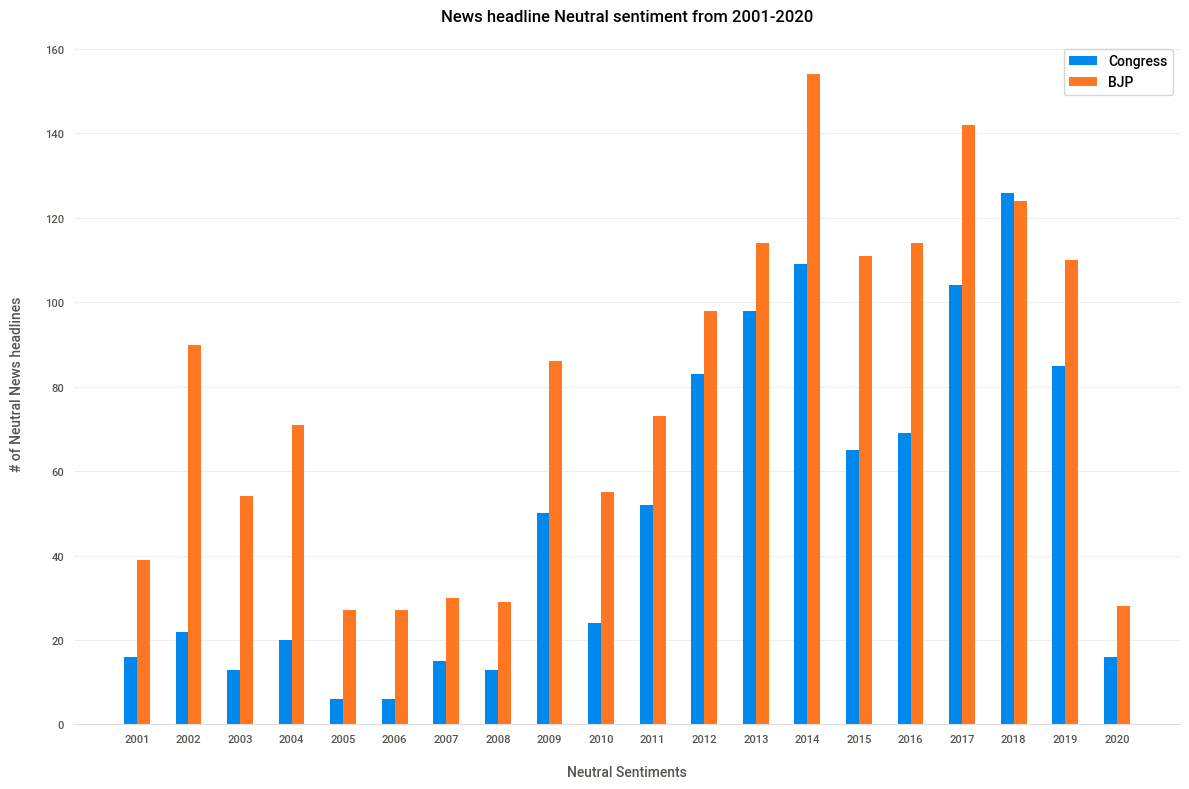

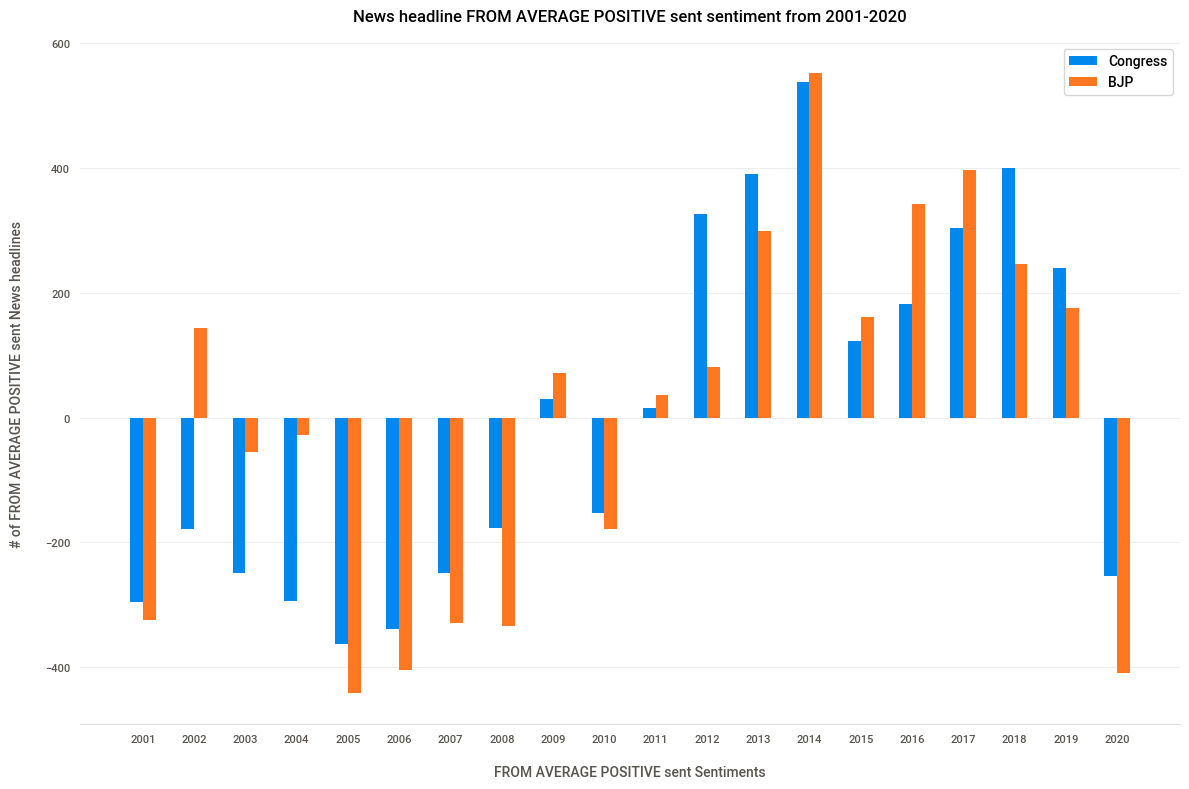

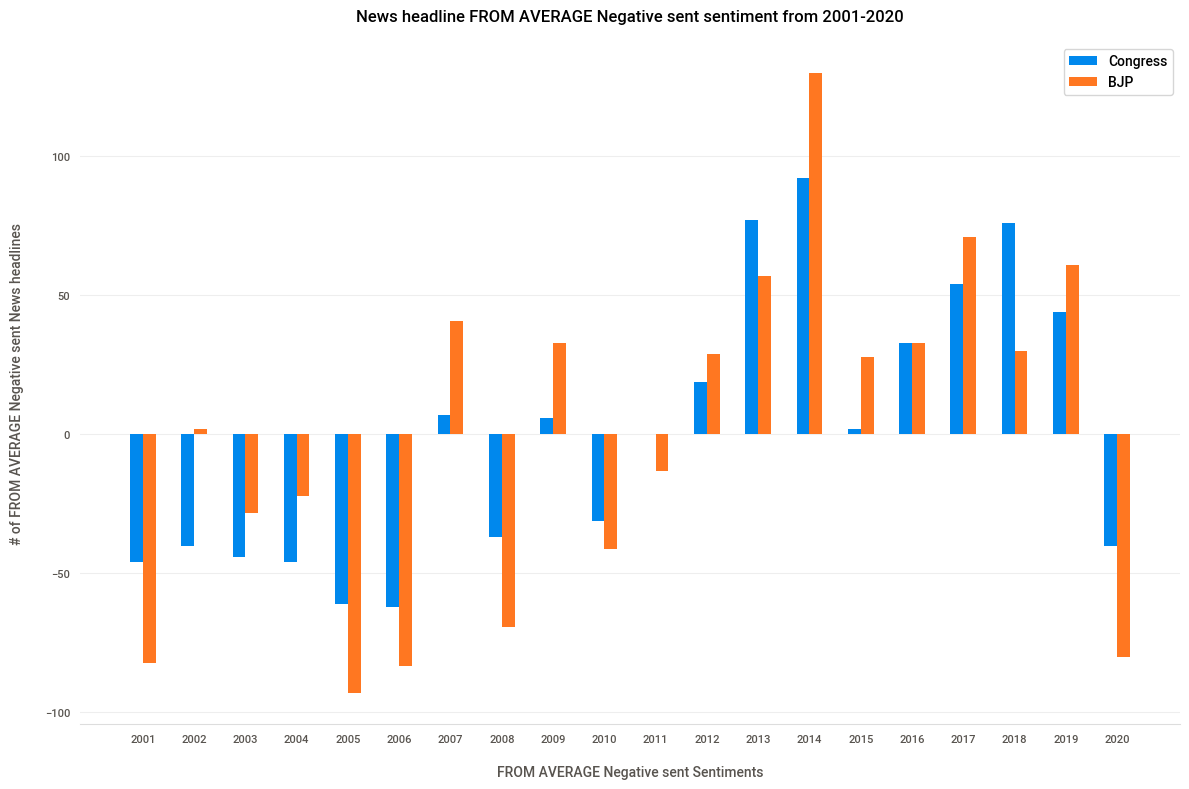

In [21]:
# bjp and cong sentiments over the years


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
def plot_sent(cpos,bpos,sent):
  """Plot  sentiments for given data.

    Keyword arguments:
    cpos -- sentiments for congress
    bpos -- sentiments for bjp
    sent -- type of sentiment : postive, negative or neutral
    """
  fig, ax = plt.subplots(figsize=(12, 8))
  x = np.arange(len(years))

  # Define bar width. We'll use this to offset the second bar.
  bar_width = 0.25

  # Note we add the `width` parameter now which sets the width of each bar.
  b1 = ax.bar(x, cpos, width=bar_width,label = "Congress")
  # Same thing, but offset the x by the width of the bar.
  b2 = ax.bar(x + bar_width, bpos,width=bar_width,label="BJP")
  


  # Create legend & Show graphic
  plt.legend()
  ax.set_xticks(x + bar_width / 2)
  ax.set_xticklabels(years)
  # Axis styling.
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_color('#DDDDDD')
  ax.tick_params(bottom=False, left=False)
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, color='#EEEEEE')
  ax.xaxis.grid(False)

  # Add axis and chart labels.
  ax.set_xlabel(sent+' Sentiments', labelpad=15)
  ax.set_ylabel('# of '+sent +' News headlines', labelpad=15)
  ax.set_title('News headline ' +sent +' sentiment from 2001-2020', pad=15)

  autolabel(b1)
  autolabel(b2)
  fig.tight_layout()
  plt.show()



plot_sent(cpos,bpos,sent="Positive")
plot_sent(cneg,bneg,sent="Negative")
plot_sent(cneu,bneu,sent="Neutral")
plot_sent(cmean,bmean,sent = "FROM AVERAGE POSITIVE sent")
plot_sent(cnmean,bnmean,sent = "FROM AVERAGE Negative sent")

# cnet  = [a_i - b_i for a_i, b_i in zip(cpos, cneg)]
# bnet = [a_i - b_i for a_i, b_i in zip(bpos, bneg)]
# plot_sent(cnet,bnet,sent="Positive - Negative ")

In [22]:
# correlation between sentiments for both parties


corr, _ = pearsonr(bpos, cpos)
print('Pearsons correlation Positive : %.3f' % corr)
corr, _ = pearsonr(bneg, cneg)
print('Pearsons correlation Negative : %.3f' % corr)
corr, _ = pearsonr(bneu, cneu)
print('Pearsons correlation Neutral: %.3f' % corr)

Pearsons correlation Positive : 0.875
Pearsons correlation Negative : 0.891
Pearsons correlation Neutral: 0.916


8581     2001
9064     2001
9168     2001
12014    2001
14534    2001
Name: year, dtype: int64 4154


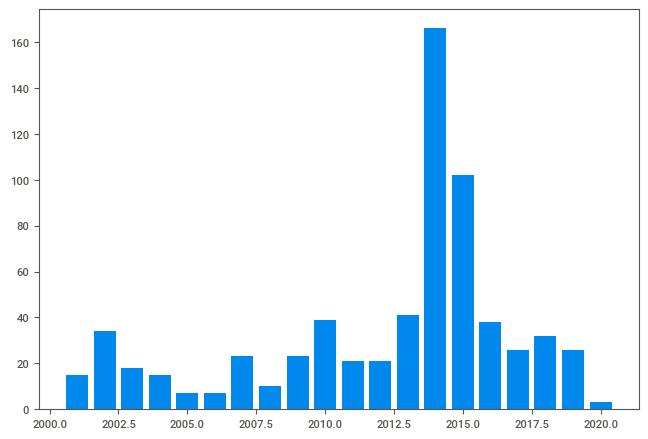

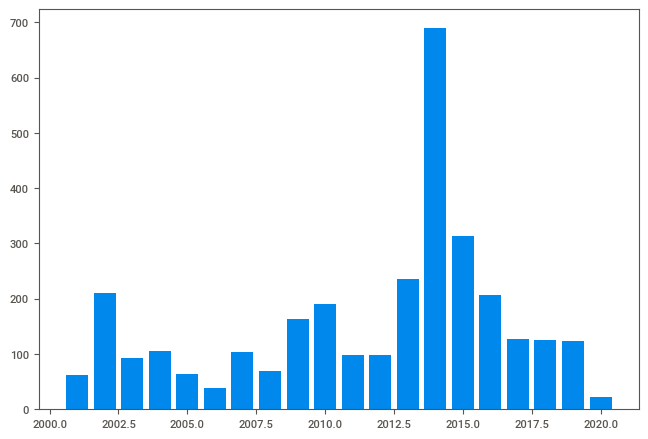

In [23]:
#Group by + - neutral for last 20 years - Only positive negative for modi

mpos = []
mneg = []
mneu = []

print(modi["year"][:5],len(modi))

for year in np.arange(2001,2021,1):
  m = modi[modi["year"] == year ]
  #c = congress[congress["year"] ==year ]
  sentiment_scores_tb, sentiment_category_tb = compute_sentiments(m)
  
  modi_sent = pd.DataFrame(sentiment_category_tb )
  modi_vals = modi_sent.value_counts()
  #print (modi_vals)
  mpos.append(modi_vals[0])
  mneg.append(modi_vals[1])
  mneu.append(modi_vals[2])

 

years = np.arange(2001,2021,1)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(years,mneg)
plt.show()
#print (mpos,mneg,mneu)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(years,mpos)
plt.show()
#print (mpos,mneg,mneu)


# Top trigrams, nouns and verbs for BJP and Congress

(1152, 4)
               publish_date  ... month
3024600 2019-01-01 00:01:00  ...     1
3024689 2019-01-01 00:01:00  ...     1
3025037 2019-01-02 00:01:00  ...     1
3025072 2019-01-02 00:01:00  ...     1
3025233 2019-01-02 00:01:00  ...     1

[5 rows x 4 columns]


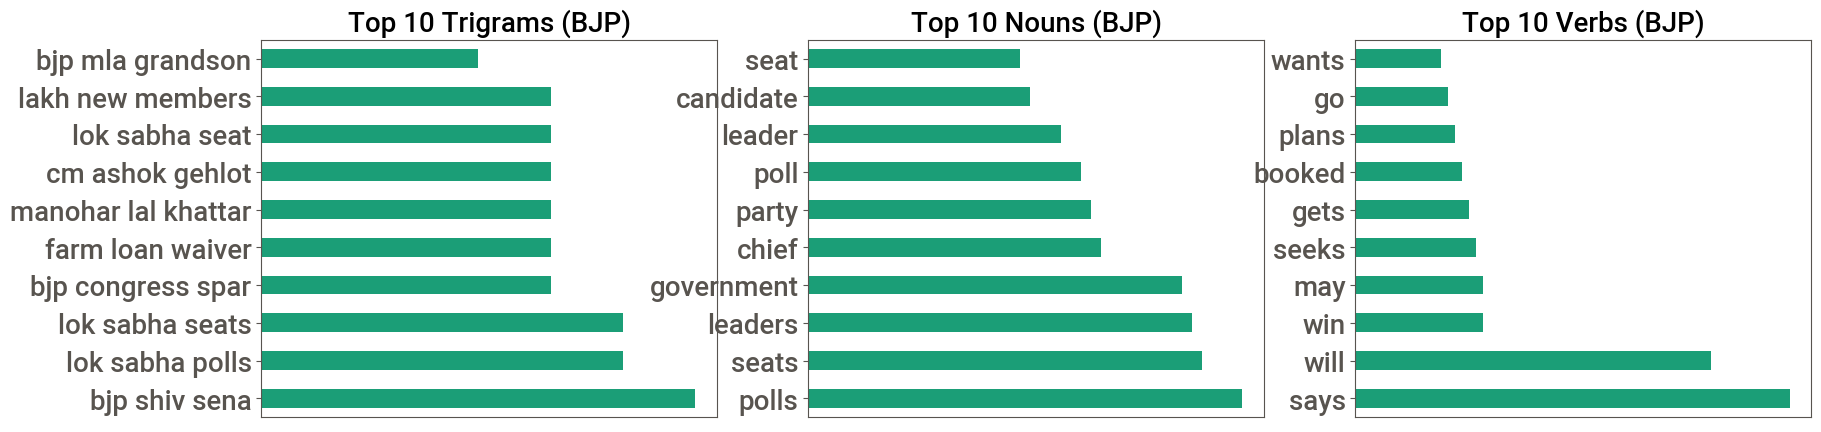

In [26]:
#top BJP 2019 trigrams and words and nouns

## top trigrams
bjp2019 = bjp[bjp["year"]==2019]
print(bjp2019.shape)
print (bjp2019.head())
from sklearn.feature_extraction import text

bow=bjp2019['headline_text'].tolist()
bjp_trigrams=get_imp(bow,mf=5000,ngram=3)

text_bjp=bjp2019['headline_text'].tolist()
noun_bjp = []
verb_bjp = []

def noun_verb(text_data):
  """compute nouns and verbs for given data.

    Keyword arguments:
    data -- input data for analysis
  """
  noun = []
  verb = []
  for doc in nlp.pipe(text_data,n_threads=16,batch_size=1000):
      try:
          for c in doc:
              if c.pos_=='NOUN':
                  noun.append(c.text)
              elif c.pos_=="VERB":
                  verb.append(c.text)
      except:
          for c in doc:
              noun.append("") 
              verb.append("")
  return noun,verb



def plot_noun_verb(trigrams,nouns,verbs,party = "BJP"):
  """Plot nouns, verbs and trigrams for a party

    Keyword arguments:
    trigrams -- top trigrams
    nouns -- top nouns
    verbs -- top verbs
    party -- party whose data is being analyzed
  """
  plt.subplot(1,3,1)
  trigrams.head(10).plot(kind="barh",figsize=(20,5),colormap="Dark2")
  plt.title("Top 10 Trigrams ("+party+")",fontsize=20)
  plt.yticks(size=20)
  plt.xticks([])
  plt.subplot(1,3,2)
  pd.Series(nouns).value_counts().head(10).plot(kind="barh",figsize=(20,5),colormap="Dark2")
  plt.title("Top 10 Nouns ("+party+")",fontsize=20)
  plt.yticks(size=20)
  plt.xticks([])
  plt.subplot(1,3,3)
  pd.Series(verbs).value_counts().head(10).plot(kind="barh",figsize=(20,5),colormap="Dark2")
  plt.title("Top 10 Verbs ("+party+")",fontsize=20)
  plt.yticks(size=20)
  plt.xticks([])

noun_bjp, verb_bjp = noun_verb(text_bjp)
plot_noun_verb(bjp_trigrams,noun_bjp,verb_bjp,party="BJP")

(840, 4)


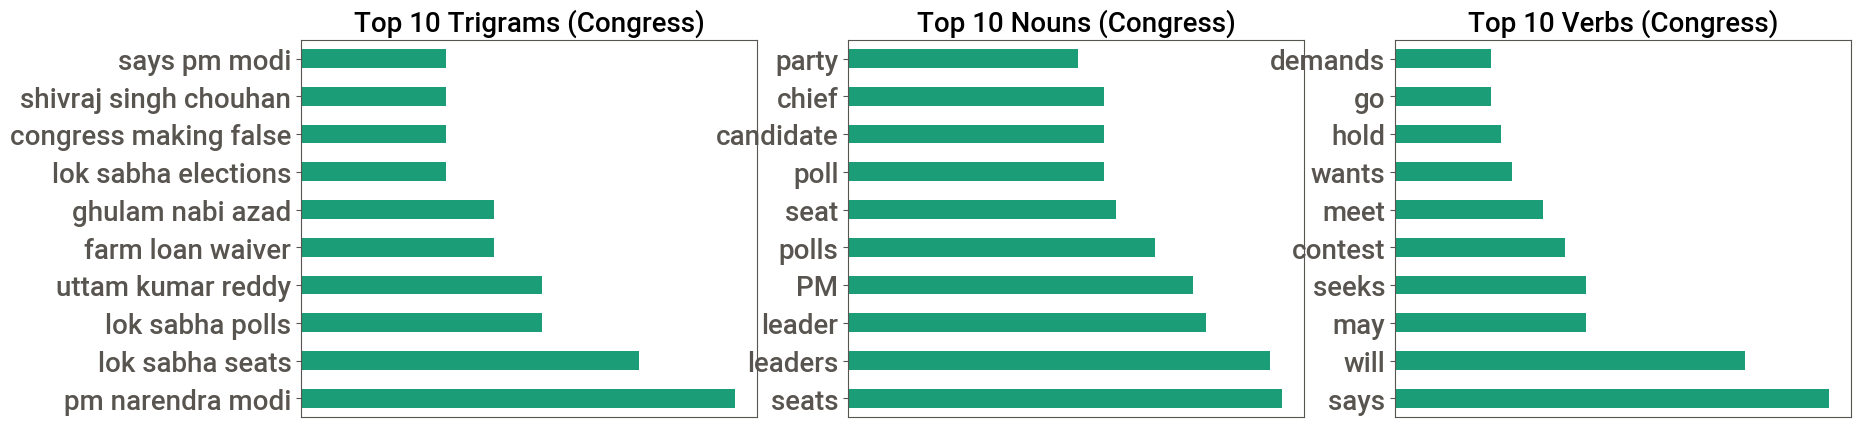

In [27]:
#top Congress 2019 trigrams and words and nouns

## top trigrams
cong2019 = congress[congress["year"]==2019]
print (cong2019.shape)


bow=cong2019['headline_text'].tolist()
cong_trigrams=get_imp(bow,mf=5000,ngram=3)

text_cong=cong2019['headline_text'].tolist()

noun_cong, verb_cong = noun_verb(text_cong)
plot_noun_verb(cong_trigrams,noun_cong,verb_cong,party="Congress")

In [ ]:
# package list in runtime
!pip list